## 1. Понимание бизнеса

### 1.1 Цель

Разработать регрессионную модель для предсказания уровня качества вина на основе его физико-химических параметров

### 1.2 Описание

Набор данных был первоначально размещен в репозитории машинного обучения UCI. В окончательном варианте набор данных загружен с сайта Kaggle (https://www.kaggle.com/rajyellow46/wine-quality).

В наборе данных предствалена информация о красном (25%) и белом (75%) вариантах португальского вина Vinho Verde. Набор данных был сформирован в 2009 году.

По информации от составителей данных, данные не сбалансированы, т.е. большего всего присутсвуют данные о винах среднего качества (и мало данных о винах низкого и высокого качества). Составители data set указывают, что не все предикторы могут представлять интерес для решения задачи.

### 2. Разведочный анализ данных

### 2.1 Загрузка библиотек

In [157]:
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

### 2.2 Загрузка данных

In [130]:
data = pd.read_csv('winequalityN.csv')

### 2.3 Статистика и визуализации

In [4]:
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Описание переменных:
1. type - тип вина: бинарная переменная (red/white)
2. fixed acidity - постоянная кислотность: числовая переменная
3. volatile acidity - переменная кислотность: числовая переменная
4. citric acid - содержание лимонной кислоты: числовая переменная
5. residual sugar - остаточный сахар: числовая переменная
6. chlorides - хлориды: числовая переменная
7. free sulfur dioxide - свободный диоксид серы: числовая переменная
8. total sulfur dioxide	 - общий диоксид серы: числовая переменная
9. density - плотность: числовая переменная
10. pH - уровень кислотности: числовая переменная
11. sulphates - сульфаты: числовая переменная
12. alcohol - содержание спирта: числовая переменная
13. quality - уровень качества: порядковая категориальная переменная

#### 2.3.1 Ключевая информация о переменных

Посмотрим на числовые переменные

In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


В результате анализа числовы переменных было выявлены две аномалии:
1. У переменных residual sugar и free sulfur dioxide среднее и максимальное значения отличаются на порядок. Данная ситуация может быть связана с наличием выбросных значений.
2. В переменных fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, pH и sulphates присутсвуют пропущенные значения. При подготовке данных для анализа необходимо будет решить данную проблему.

Посмотрим на категориальные переменные

In [5]:
data.describe(include = 'object')

,type
count,6497
unique,2
top,white
freq,4898


В категориальной переменной пропущенных значений нет.

In [6]:
data.shape

(6497, 13)

Построим по всем числовым переменных гистограмму и диаграмму размаха

#### 1. fixed acidity	

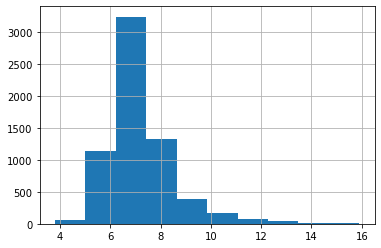

In [13]:
plt.hist(data['fixed acidity'])
plt.grid()
plt.show()

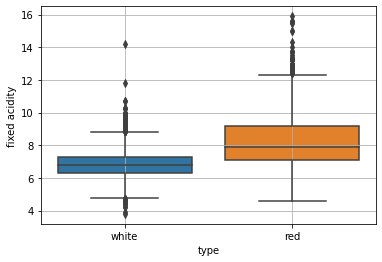

In [15]:
ax = sns.boxplot(x="type", y="fixed acidity", data=data)
plt.grid()

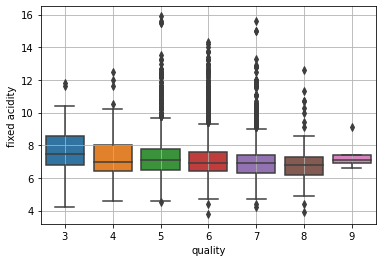

In [25]:
ax = sns.boxplot(x="quality", y="fixed acidity", data=data)
plt.grid()

Уровень постоянной кислотности больше у красного вина

Определим количество пропущенных данных

In [16]:
data['fixed acidity'].isnull().sum()

10

#### 2. volatile acidity

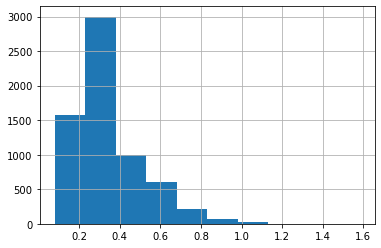

In [17]:
plt.hist(data['volatile acidity'])
plt.grid()
plt.show()

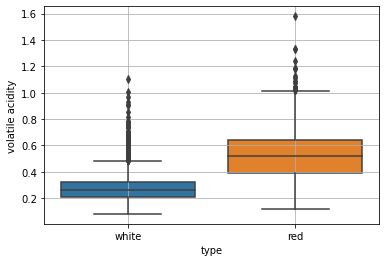

In [18]:
ax = sns.boxplot(x="type", y="volatile acidity", data=data)
plt.grid()

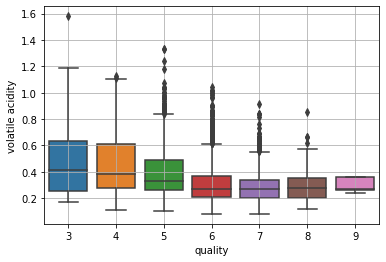

In [24]:
ax = sns.boxplot(x="quality", y="volatile acidity", data=data)
plt.grid()

Уровень переменной кислотности больше у красного вина

Определим количество пропущенных данных

In [19]:
data['volatile acidity'].isnull().sum()

8

#### 3. citric acid

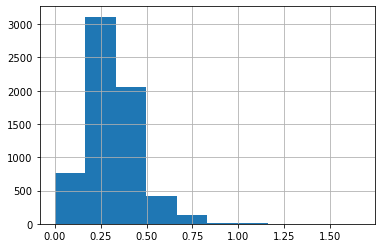

In [20]:
plt.hist(data['citric acid'])
plt.grid()
plt.show()

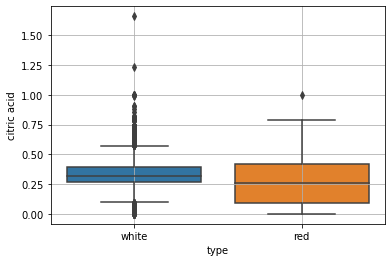

In [21]:
ax = sns.boxplot(x="type", y="citric acid", data=data)
plt.grid()

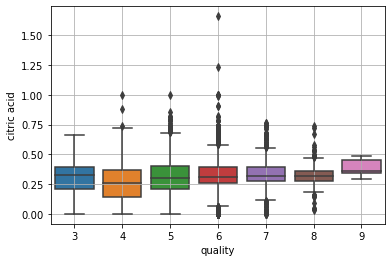

In [23]:
ax = sns.boxplot(x="quality", y="citric acid", data=data)
plt.grid()

В целом, уровень лимонной кислоты не отличается для разных типов вина

Определим количество пропущенных данных

In [22]:
data['citric acid'].isnull().sum()

3

#### 4. residual sugar	

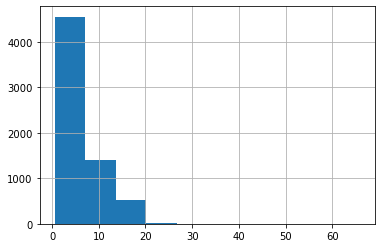

In [30]:
plt.hist(data['residual sugar'])
plt.grid()
plt.show()

In [37]:
data[data['residual sugar'] > 30]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1653,white,7.9,0.330,0.28,31.6,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
1663,white,7.9,0.330,0.28,31.6,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
2781,white,7.8,0.965,0.60,65.8,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6


Вин с очень большим содержанием остаточного сахара не много. Впоследствии, их можно будет удалить.

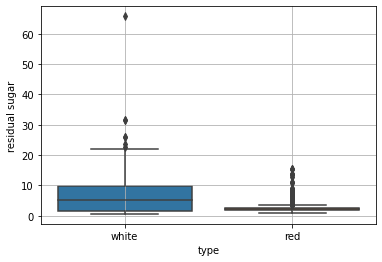

In [31]:
ax = sns.boxplot(x="type", y="residual sugar", data=data)
plt.grid()

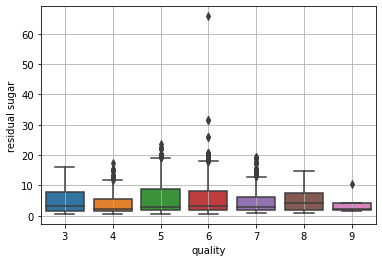

In [38]:
ax = sns.boxplot(x="quality", y="residual sugar", data=data)
plt.grid()

Определим количество пропущенных данных

In [39]:
data['residual sugar'].isnull().sum()

2

#### 5. chlorides

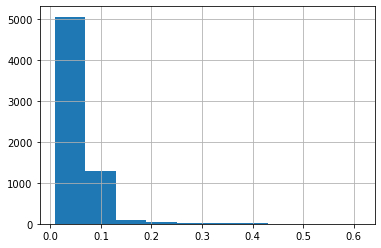

In [40]:
plt.hist(data['chlorides'])
plt.grid()
plt.show()

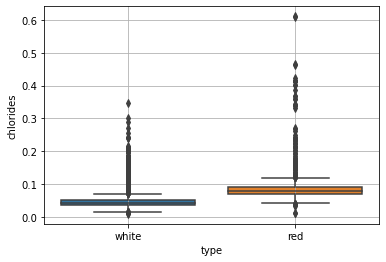

In [41]:
ax = sns.boxplot(x="type", y="chlorides", data=data)
plt.grid()

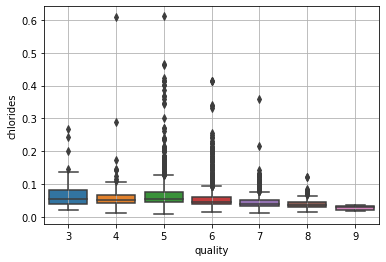

In [42]:
ax = sns.boxplot(x="quality", y="chlorides", data=data)
plt.grid()

In [46]:
data[data['chlorides'] > 0.5]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
5049,red,9.2,0.52,1.00,3.4,0.610,32.0,69.0,0.9996,2.74,2.00,9.4,4
5156,red,7.7,0.41,0.76,1.8,0.611,8.0,45.0,0.9968,3.06,1.26,9.4,5


Потенциальные претенденты на удаление

Определим количество пропущенных данных

In [47]:
data['chlorides'].isnull().sum()

2

#### 6. free sulfur dioxide

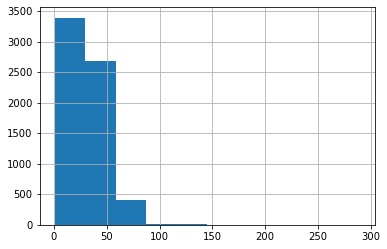

In [49]:
plt.hist(data['free sulfur dioxide'])
plt.grid()
plt.show()

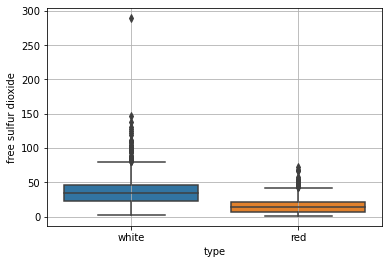

In [50]:
ax = sns.boxplot(x="type", y="free sulfur dioxide", data=data)
plt.grid()

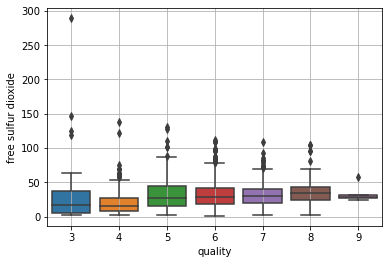

In [51]:
ax = sns.boxplot(x="quality", y="free sulfur dioxide", data=data)
plt.grid()

In [53]:
data[data['free sulfur dioxide'] > 150]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4745,white,6.1,0.26,0.25,2.9,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3


Потенциальные претенденты на удаление

Определим количество пропущенных данных

In [54]:
data['free sulfur dioxide'].isnull().sum()

0

#### 7. total sulfur dioxide

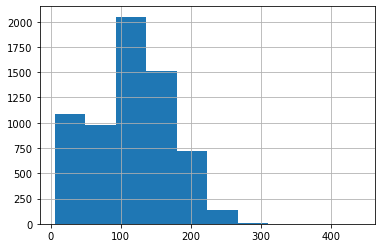

In [56]:
plt.hist(data['total sulfur dioxide'])
plt.grid()
plt.show()

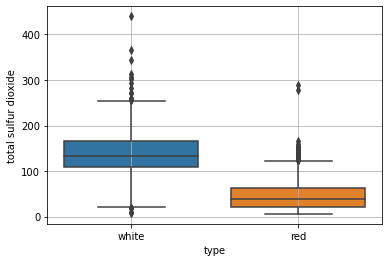

In [58]:
ax = sns.boxplot(x="type", y="total sulfur dioxide", data=data)
plt.grid()

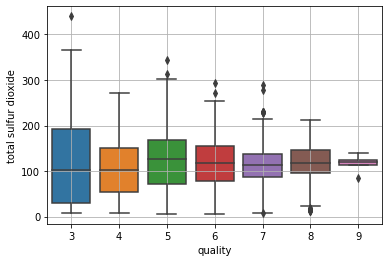

In [59]:
ax = sns.boxplot(x="quality", y="total sulfur dioxide", data=data)
plt.grid()

Определим количество пропущенных данных

In [60]:
data['total sulfur dioxide'].isnull().sum()

0

#### 8. density

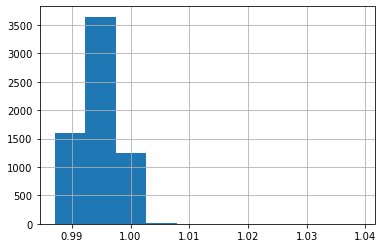

In [62]:
plt.hist(data['density'])
plt.grid()
plt.show()

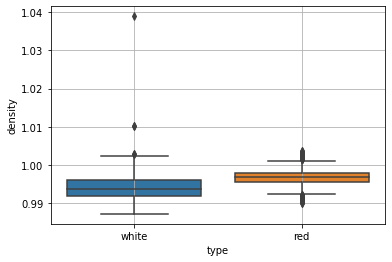

In [63]:
ax = sns.boxplot(x="type", y="density", data=data)
plt.grid()

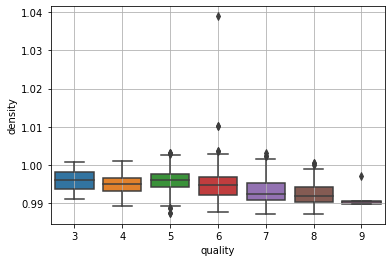

In [64]:
ax = sns.boxplot(x="quality", y="density", data=data)
plt.grid()

In [65]:
data[data['density'] > 1.03]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2781,white,7.8,0.965,0.6,65.8,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6


Будем удалять

Определим количество пропущенных данных

In [66]:
data['density'].isnull().sum()

0

#### 9. pH

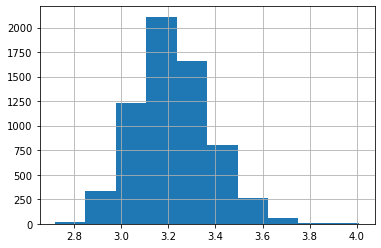

In [68]:
plt.hist(data['pH'])
plt.grid()
plt.show()

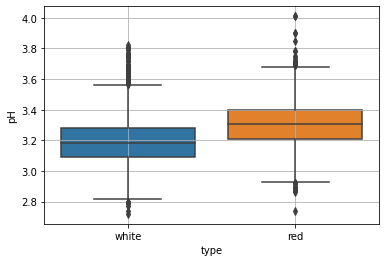

In [71]:
ax = sns.boxplot(x="type", y="pH", data=data)
plt.grid()

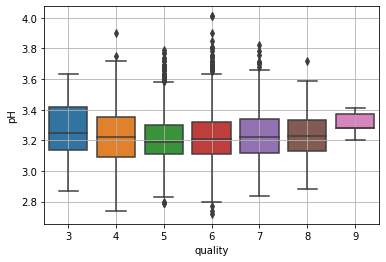

In [70]:
ax = sns.boxplot(x="quality", y="pH", data=data)
plt.grid()

Определим количество пропущенных данных

In [72]:
data['pH'].isnull().sum()

9

#### 10. sulphates

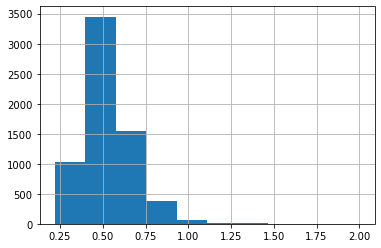

In [74]:
plt.hist(data['sulphates'])
plt.grid()
plt.show()

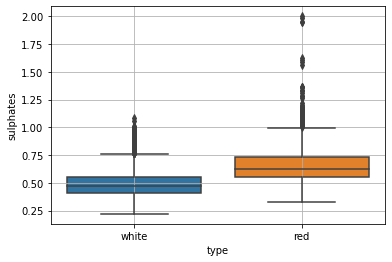

In [75]:
ax = sns.boxplot(x="type", y="sulphates", data=data)
plt.grid()

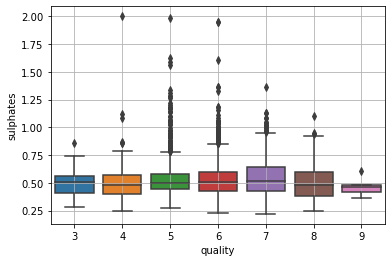

In [76]:
ax = sns.boxplot(x="quality", y="sulphates", data=data)
plt.grid()

Определим количество пропущенных данных

In [78]:
data['sulphates'].isnull().sum()

4

#### 11. alcohol

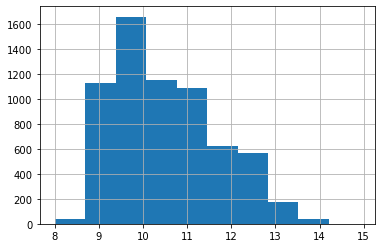

In [80]:
plt.hist(data['alcohol'])
plt.grid()
plt.show()

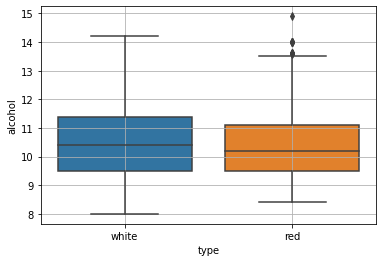

In [81]:
ax = sns.boxplot(x="type", y="alcohol", data=data)
plt.grid()

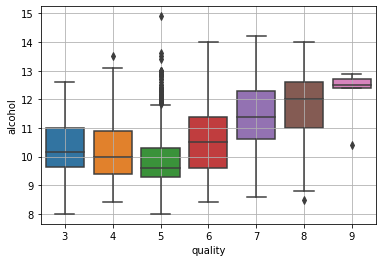

In [82]:
ax = sns.boxplot(x="quality", y="alcohol", data=data)
plt.grid()

Определим количество пропущенных данных

In [83]:
data['alcohol'].isnull().sum()

0

#### 12. quality

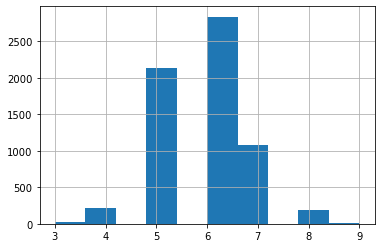

In [85]:
plt.hist(data['quality'])
plt.grid()
plt.show()

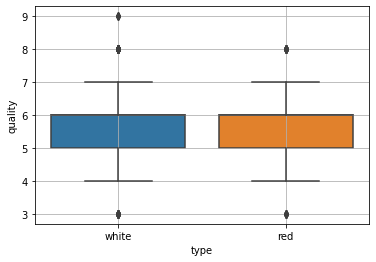

In [86]:
ax = sns.boxplot(x="type", y="quality", data=data)
plt.grid()

Определим количество пропущенных данных

In [87]:
data['quality'].isnull().sum()

0

#### 2.3.2 Тепловая карта

In [6]:
data_corr = data.corr()

<AxesSubplot:>

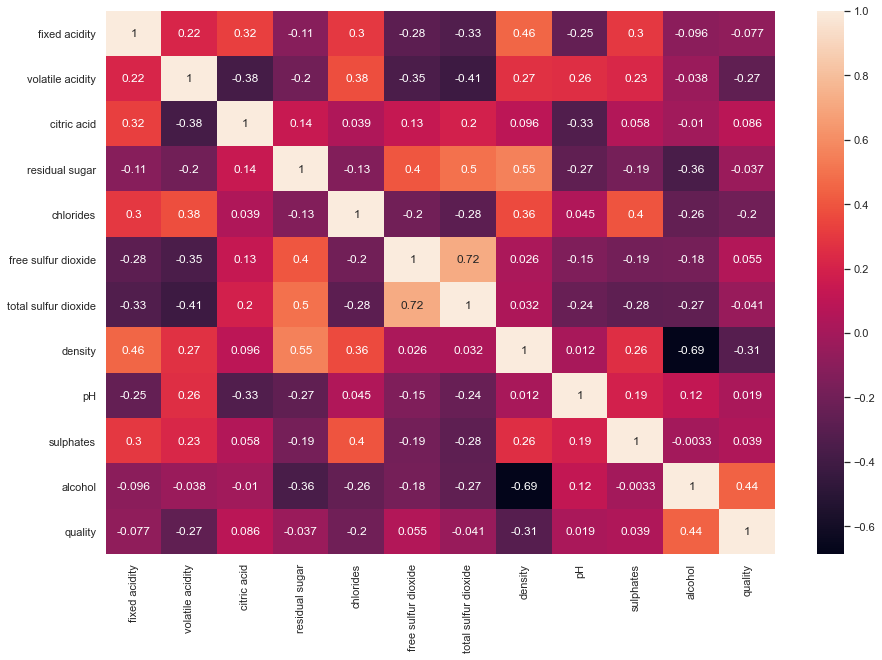

In [7]:
sns.set(rc = ({'figure.figsize':(15, 10)}))
sns.heatmap(data_corr, annot = True, 
            xticklabels = data_corr.columns.values, 
            yticklabels = data_corr.columns.values)

Интересующая нас переменная (quality) в наибольщей степени коррелирует со следующими переменными:
* alcohol - содержание спирта;
* density - плотность;
* volatile acidity - переменная кислотность;
* chlorides - хлориды.

### 3. Подготовка данных

#### 3.1. Удалим пропущенные и выбросные значения

В результате разведочного анализа данных было выявлено, что пропущенных значений не очень много (по сравнению с общим объемом набора):
* fixed acidity - 10;
* volatile acidity - 8;
* citric acid - 3;
* residual sugar - 2;
* chlorides - 2;
* pH - 9;
* sulphates - 4.

Даже если предположить, что эти пропущенные значения не пересекаются между переменными, то суммарное их количество составляет 38. По отношению к объему данных (6497) это составляет менее 1%.
В связи с этим, было принято решение удалить эти пропущенные данные.

In [131]:
data.dropna(inplace=True)

In [132]:
data=data.reset_index(drop = True)

Кроме того, необходимо удалить выбросные значения:
* citric acid > 1.2;
* residual sugar > 40;
* free sulfur dioxide > 160;
* density > 1.02.

In [133]:
data = data[data['citric acid'] < 1.2]

In [134]:
data = data[data['residual sugar'] < 40]

In [135]:
data = data[data['free sulfur dioxide'] < 160]

In [136]:
data = data[data['density'] < 1.02]

In [137]:
data.shape

(6459, 13)

In [138]:
data=data.reset_index(drop = True)

Таким образом, в результате удаления пропущенных и выбросных значений объем данных сократился менее, чем на 1%.

#### 3.2. Преобразуем категориальные переменные в числовые

Преобразуем бинарную переменную type с помощью OneHotEncoder

In [139]:
oh_enc = OneHotEncoder()

In [140]:
type_features = oh_enc.fit_transform(data[['type']]).toarray()
type_features = pd.DataFrame(type_features, columns = oh_enc.categories_[0])
type_features.head()

,red,white
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


Один столбец полностью определяет значения другого, поэтому удалим один из столбцов.

In [141]:
type_features.drop(['white'], axis=1, inplace=True)

#### 3.3. Сборка финальных датасетов для моделирования

Произведем нормировку "min-max"

In [143]:
real_var = data.drop(['type','quality'], axis = 1)

In [144]:
mm_scaler = MinMaxScaler()
mm_scaled_real_var = mm_scaler.fit_transform(real_var)
mm_scaled_real_var = pd.DataFrame(mm_scaled_real_var, columns = real_var.columns)
mm_scaled_real_var.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.264463,0.126667,0.36,0.648387,0.059801,0.302405,0.454924,0.598965,0.217054,0.129213,0.115942
1,0.206612,0.146667,0.34,0.032258,0.066445,0.089347,0.349515,0.297111,0.449612,0.151685,0.217391
2,0.355372,0.133333,0.40,0.203226,0.068106,0.199313,0.252427,0.344545,0.418605,0.123596,0.304348
3,0.280992,0.100000,0.32,0.254839,0.081395,0.316151,0.499307,0.366106,0.364341,0.101124,0.275362
4,0.280992,0.100000,0.32,0.254839,0.081395,0.316151,0.499307,0.366106,0.364341,0.101124,0.275362


Объединим два набора данных: real_var и type_features:

In [148]:
new_data = mm_scaled_real_var.join(type_features)

In [149]:
new_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,red
0,0.264463,0.126667,0.36,0.648387,0.059801,0.302405,0.454924,0.598965,0.217054,0.129213,0.115942,0.0
1,0.206612,0.146667,0.34,0.032258,0.066445,0.089347,0.349515,0.297111,0.449612,0.151685,0.217391,0.0
2,0.355372,0.133333,0.40,0.203226,0.068106,0.199313,0.252427,0.344545,0.418605,0.123596,0.304348,0.0
3,0.280992,0.100000,0.32,0.254839,0.081395,0.316151,0.499307,0.366106,0.364341,0.101124,0.275362,0.0
4,0.280992,0.100000,0.32,0.254839,0.081395,0.316151,0.499307,0.366106,0.364341,0.101124,0.275362,0.0


In [150]:
new_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,red
count,6459.000000,6459.000000,6459.000000,6459.000000,6459.000000,6459.000000,6459.000000,6459.000000,6459.000000,6459.000000,6459.000000,6459.000000
mean,0.282459,0.173027,0.318376,0.155989,0.078178,0.202588,0.304051,0.326961,0.386274,0.174787,0.361155,0.246633
std,0.107290,0.109660,0.143844,0.151560,0.058276,0.120045,0.156321,0.127233,0.124530,0.083671,0.172866,0.431084
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.214876,0.100000,0.250000,0.038710,0.048173,0.109966,0.196949,0.225528,0.302326,0.117978,0.217391,0.000000
50%,0.264463,0.140000,0.310000,0.077419,0.063123,0.192440,0.310680,0.335489,0.379845,0.162921,0.333333,0.000000
75%,0.322314,0.213333,0.390000,0.241935,0.093023,0.274914,0.416089,0.426477,0.465116,0.213483,0.478261,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 3.4. Создание обучающей и контрольной выборки

In [151]:
y = data['quality'].reset_index(drop = True)
len(y)

6459

In [154]:
rand_state = 50
X_train, X_test, y_train, y_test = train_test_split(new_data, y, test_size=0.2, random_state=rand_state)

### 4. Моделирование и оценка

#### 4.1. Выбор модели

В качестве модели будем использовать мноественную линейную регрессию

In [159]:
def lin_reg_fit(X_train, X_test, y_train, y_test):
    estimator = LinearRegression()
    estimator.fit(X_train, y_train)

    train_pred = estimator.predict(X_train)
    test_pred = estimator.predict(X_test)
    
    train_mae = mean_absolute_error(train_pred, y_train)
    test_mae = mean_absolute_error(test_pred, y_test)
    
    print(f'Train MAE: {np.round(train_mae, 4)}')
    print(f'Test MAE: {np.round(test_mae, 4)}')
    
    return estimator

#### 4.2. Оценка модели

In [158]:
est = lin_reg_fit(X_train, X_test, y_train, y_test)

Train MAE: 0.5677
Test MAE: 0.5675


В среднем ошибка составляет 0,5 балла при определении качества вина.

### 5. Развертывание

Развертывание в данном случае предполагает загрузку файла на Kaggle.

https://www.kaggle.com/tatjanaboyko/wine-quality-netology